**Objective:**
How do annual members and casual users use cyclistic bike differently?


**Business Background**

Business Model:
    Product: bike-sharing geotracked and network locked bikes across Chicago
    
    Customer types and revenue model: members (annual subscribers) and casual riders (single-ride and full-day purchasers)
    
**Product Background:**

    5,824 bicycles and 692 docking stations
    More than 50% of riders select traditional bikes
    8% of riders opt for the assistive bike options
    30% of users bike to commute to work each day
    Users are more likely to ride for leisure
    Casual riders have chosen Cyclistic for their mobility needs


In [2]:
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [3]:
import os # for creating and removing a directory 
#(folder), fetching its contents, changing and identifying the current directory
import glob #glob (short for global) is used to return all file paths that match a specific pattern.

In [4]:
#function to concat all 12 months csv files 
def get_merged_df(data_folder_path: str) -> pd.DataFrame:
    files = list(os.listdir(data_folder_path)) #list of csv files in that directory
    file_paths = [data_folder_path + f for f in files] #location for each csv file 
    #load all files
    #df_per_file is a generator object where all the csv are read 
    df_per_file = (pd.read_csv(fp, 
                               low_memory = False, #data chunk (packet data with mixed type inference)
                               parse_dates = ['started_at', 'ended_at'], #converted to datetime datatype
                               infer_datetime_format = True,
                               memory_map = True)#map the file object directly onto memory and access the data directly from there
                  for fp in file_paths)
    return pd.concat(df_per_file, ignore_index = True) # all files are concatenated 
# calling the function passing the location of DATA folder
df = get_merged_df(os.getcwd() + "\\DATA\\") 

In [5]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,6C992BD37A98A63F,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,TA1307000061,Southport Ave & Waveland Ave,13235,41.897448,-87.628722,41.948150,-87.663940,member
1,1E0145613A209000,docked_bike,2021-04-27 17:27:11,2021-04-27 18:31:29,Dorchester Ave & 49th St,KA1503000069,Dorchester Ave & 49th St,KA1503000069,41.805772,-87.592464,41.805772,-87.592464,casual
2,E498E15508A80BAD,docked_bike,2021-04-03 12:42:45,2021-04-07 11:40:24,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,41.741487,-87.658410,casual
3,1887262AD101C604,classic_bike,2021-04-17 09:17:42,2021-04-17 09:42:48,Honore St & Division St,TA1305000034,Southport Ave & Waveland Ave,13235,41.903119,-87.673935,41.948150,-87.663940,member
4,C123548CAB2A32A5,docked_bike,2021-04-03 12:42:25,2021-04-03 14:13:42,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,41.741487,-87.658410,casual


In [6]:
df.tail()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
5723527,E23BE3DB740BE3B4,docked_bike,2022-03-13 16:31:03,2022-03-13 16:39:32,Michigan Ave & Oak St,13042,Streeter Dr & Grand Ave,13022,41.900960,-87.623777,41.892278,-87.612043,casual
5723528,15AF71F3220F2A75,docked_bike,2022-03-09 06:56:02,2022-03-09 07:42:14,Broadway & Barry Ave,13137,Ravenswood Ave & Berteau Ave,TA1309000018,41.937582,-87.644098,41.957921,-87.673567,casual
5723529,9C4CE6CC19F8225B,electric_bike,2022-03-09 15:55:26,2022-03-09 16:08:54,NaN,NaN,Albany Ave & Montrose Ave,15621,41.940000,-87.710000,41.961041,-87.705866,member
5723530,F4E136DEF696F3AE,electric_bike,2022-03-21 16:12:44,2022-03-21 16:18:24,NaN,NaN,Larrabee St & Division St,KA1504000079,41.910000,-87.650000,41.903486,-87.643353,member
5723531,5AEC5F39AF711895,classic_bike,2022-03-03 18:13:40,2022-03-03 18:23:39,Clark St & Randolph St,TA1305000030,Streeter Dr & Grand Ave,13022,41.884576,-87.631890,41.892278,-87.612043,member


In [7]:
df.shape

(5723532, 13)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5723532 entries, 0 to 5723531
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
dtypes: datetime64[ns](2), float64(4), object(7)
memory usage: 567.7+ MB


In [9]:
missing=df.isnull().sum() #no of missing values in each column
missing

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    745376
start_station_id      745373
end_station_name      796247
end_station_id        796247
start_lat                  0
start_lng                  0
end_lat                 4716
end_lng                 4716
member_casual              0
dtype: int64

In [10]:
df["end_station_name"].isnull().sum() 
#finding no of null values in end_station_name column because it has max null values

796247

In [11]:
df.shape[0] #no of rows 

5723532

In [12]:
(df["end_station_name"].isnull().sum()/df.shape[0])*100
#13.9% of values is missing from a column at max 

13.911811797330738

### Checking for duplicate values 

In [13]:
#ride_id should have unique values 
df["ride_id"].nunique()  
#there are 5723532 unique values in ride_id column total rows=5723532
#so no duplicates in ride_id columns which is most probably the primary key 

5723532

In [14]:
# checking the number of unique values per column
print("Unique values per column")
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")

Unique values per column
ride_id: 5723532
rideable_type: 3
started_at: 4793191
ended_at: 4787114
start_station_name: 861
start_station_id: 852
end_station_name: 860
end_station_id: 852
start_lat: 433057
start_lng: 411835
end_lat: 434703
end_lng: 396215
member_casual: 2


#### Observation:

    1."ride_id", presumably the intended primary key of this table, clearly has no duplicates since the number of unique values is equal to the data frame's size(records)
    2."rideable_type" and "member_casual" both have a limited number of unique values
    3.There are more station_name than station id, which implies that many station IDS are associated with multiple station name (one id for multtiple station name as id :852< name:861)



In [15]:
#function to find Number of station IDs with more than one name
def get_inconsistent_ids_series():
    start_ids_sr = df.groupby(['start_station_id','start_station_name']).size().rename_axis(index={'start_station_id': 'id', 'start_station_name': 'station_name'})
    end_ids_sr = df.groupby(['end_station_id','end_station_name']).size().rename_axis(index={'end_station_id': 'id', 'end_station_name': 'station_name'})

    vc1 = start_ids_sr.reset_index()['id'].value_counts() #taking only the id column ,finding count for each unique values in id
    vc2 = end_ids_sr.reset_index()['id'].value_counts()

    start_ids_with_many_names = vc1[vc1 > 1].index #id where vc1 is greater than 1
    end_ids_with_many_names = vc2[vc2 > 1].index

    start_mask = start_ids_sr.index.get_level_values(0).isin(start_ids_with_many_names) #gives True or false
    start_ids_sr[start_mask]  #where condition true takes those values 
    end_mask = end_ids_sr.index.get_level_values(0).isin(end_ids_with_many_names)  
    end_ids_sr[end_mask]

    return pd.concat([start_ids_sr[start_mask], end_ids_sr[end_mask]], axis = 0)

inconsistent_ids_series = get_inconsistent_ids_series()
print("Number of station IDs with more than one name associated with it:", len(inconsistent_ids_series))
inconsistent_ids_series.head(10)

Number of station IDs with more than one name associated with it: 40


id      station_name                      
13099   Halsted St & 18th St                   1752
        Halsted St & 18th St (Temp)            1830
13300   DuSable Lake Shore Dr & Monroe St     23459
        Lake Shore Dr & Monroe St             22133
351     351                                       2
        Mulligan Ave & Wellington Ave           317
444     N Shore Channel Trail & Argyle Ave       11
        N Shore Channel Trail & Argyle St        32
LF-005  DuSable Lake Shore Dr & North Blvd    25767
        Lake Shore Dr & North Blvd            21996
dtype: int64

### Observation:
It looks like IDs can associate with several station names due to the time series nature of our data set ,renovations, and renamings of stations. We'll move forward assuming that these instances are valid since they point to the same station.

## Transforming and cleaning the data

In [16]:
df_mem_usage = df.memory_usage(deep = True)/1_000_000
df_mem_usage # give the size of the columns in df in MB

Index                   0.000128
ride_id               417.817836
rideable_type         396.788571
started_at             45.788256
ended_at               45.788256
start_station_name    425.907421
start_station_id      349.744385
end_station_name      423.504240
end_station_id        348.071621
start_lat              45.788256
start_lng              45.788256
end_lat                45.788256
end_lng                45.788256
member_casual         360.582516
dtype: float64

In [17]:
def cols_mem_usage(*args: str) -> None:
    """Print dataframe column's memory usage in megabytes."""
    df_mem_usage = df.memory_usage(deep = True)
    for col_name in list(args):
        print(f"{col_name} total memory usage: {df_mem_usage[col_name]/1_000_000}MB")

#converting rideable_type and member_casual to category datatype
print("Before:")
cols_mem_usage('rideable_type','member_casual') #calling the function 

# let's convert these low unique count columns into categories (categories is a effiecient datatype in terms of memory)
df['rideable_type'] = df['rideable_type'].astype('category')
df['member_casual'] = df['member_casual'].astype('category')

print("After:")
cols_mem_usage('rideable_type','member_casual')  #calling the function

Before:
rideable_type total memory usage: 396.788571MB
member_casual total memory usage: 360.582516MB
After:
rideable_type total memory usage: 5.723847MB
member_casual total memory usage: 5.723766MB


In [18]:
#function to get no of dupliate value in columns
def get_duplicates(field: str):  #input field in  str datatype
    vc = df[field].value_counts()
    duplicate_index = vc[vc > 1].index.to_list()
    n_duplicates = len(duplicate_index)   #no of duplicates is len of the list
    print(f"Number of duplicates for {field}: {n_duplicates}")
    if n_duplicates > 0:
        print("Sample rows:")
        mask = df[field].isin(duplicate_index)  # isin is like a in operator in python
        return df[mask].sort_values(by = field).head(4) #printing four rows which has duplicate records
    return

get_duplicates('ride_id')

Number of duplicates for ride_id: 0


##  Finding ride _duration in negative 

In [19]:
negative_ride = (df['ended_at'] - df['started_at']) < pd.Timedelta("0 days")
print("Number of rows with negative ride durations:", len(df.loc[negative_ride]))

Number of rows with negative ride durations: 145


In [20]:
df["Ride_duration"]=(df['ended_at'] - df['started_at']) #output is in timedelta format

In [21]:
negative_ride= df["Ride_duration"]< pd.Timedelta("0 days")
negative_ride

0          False
1          False
2          False
3          False
4          False
           ...  
5723527    False
5723528    False
5723529    False
5723530    False
5723531    False
Name: Ride_duration, Length: 5723532, dtype: bool

In [22]:
df=df[~negative_ride]

In [23]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Ride_duration
0,6C992BD37A98A63F,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,TA1307000061,Southport Ave & Waveland Ave,13235,41.897448,-87.628722,41.948150,-87.663940,member,0 days 00:31:19
1,1E0145613A209000,docked_bike,2021-04-27 17:27:11,2021-04-27 18:31:29,Dorchester Ave & 49th St,KA1503000069,Dorchester Ave & 49th St,KA1503000069,41.805772,-87.592464,41.805772,-87.592464,casual,0 days 01:04:18
2,E498E15508A80BAD,docked_bike,2021-04-03 12:42:45,2021-04-07 11:40:24,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,41.741487,-87.658410,casual,3 days 22:57:39
3,1887262AD101C604,classic_bike,2021-04-17 09:17:42,2021-04-17 09:42:48,Honore St & Division St,TA1305000034,Southport Ave & Waveland Ave,13235,41.903119,-87.673935,41.948150,-87.663940,member,0 days 00:25:06
4,C123548CAB2A32A5,docked_bike,2021-04-03 12:42:25,2021-04-03 14:13:42,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,41.741487,-87.658410,casual,0 days 01:31:17


In [24]:
negative_ride = (df['ended_at'] - df['started_at']) < pd.Timedelta("0 days")
print("Number of rows with negative ride durations:", len(df.loc[negative_ride]))
#now there are no rows with negative ride duration 

Number of rows with negative ride durations: 0


## Missing values 

In [25]:
df.isnull().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    745356
start_station_id      745353
end_station_name      796228
end_station_id        796228
start_lat                  0
start_lng                  0
end_lat                 4716
end_lng                 4716
member_casual              0
Ride_duration              0
dtype: int64

In [26]:
#finding the percentage of missing values out of total cells 
total_cells = np.product(df.shape)  #finding rows*columns
total_missing = missing.sum()  #from missing finding sum (gives total of null values in all columns)
# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)
# only 4 % of data is missing from overall data 

3.8596963151863948


In [27]:
# we can drop the null values 
nullvalue = (df['start_station_name'].isnull()) | (df['start_station_id'].isnull())
df = df.loc[~nullvalue] # if both are null then remove from df
nullvalue = (df['end_station_name'].isnull()) | (df['end_station_id'].isnull())
df = df.loc[~nullvalue]

In [28]:
nullvalue=(df['end_lat'].isnull()) 
df=df.loc[~nullvalue] # if null then remove from df
nullvalue= (df['end_lng'].isnull()) 
df=df.loc[~nullvalue]

In [29]:
df.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
Ride_duration         0
dtype: int64

In [30]:
df.shape

(4641279, 14)

### Adding columns for analysis

In [31]:
df['ride_length']=df["Ride_duration"]/np.timedelta64(1, 'm') # turn it into minutes(for Hour put H)
df['start_day_of_week'] = df['started_at'].dt.dayofweek  #monday=0 and sunday=6
df['end_day_of_week'] = df['ended_at'].dt.dayofweek

In [32]:
df['start_day_of_week']=df['start_day_of_week'].map({0:"Mon",1:"Tue",2:"Wed",3:"Thu",4:"Fri",5:"Sat",6:"Sun"})

In [33]:
df['end_day_of_week']=df['end_day_of_week'].map({0:"Mon",1:"Tue",2:"Wed",3:"Thu",4:"Fri",5:"Sat",6:"Sun"})

In [34]:
df["Month"]=df["started_at"].dt.month

In [35]:
df["Month"]=df["Month"].map({1:"jan",2:"feb",3:"mar",4:"apr",5:"may",6:"june",7:"july",8:"aug",9:"sep",10:"oct",11:"nov",12:"dec"})

In [36]:
list1=("Mon","Tue","Wed","Thu","Fri")
df["Weekday/weekend"]=np.where(((df["start_day_of_week"]=="Mon")|(df["start_day_of_week"]=="Tue")|(df["start_day_of_week"]=="Wed")|(df["start_day_of_week"]=="Thu")|(df["start_day_of_week"]=="Fri")),"Weekday","Weekend")

In [37]:
df["Time"]=df["started_at"].dt.hour

In [38]:
df.head(2)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Ride_duration,ride_length,start_day_of_week,end_day_of_week,Month,Weekday/weekend,Time
0,6C992BD37A98A63F,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,TA1307000061,Southport Ave & Waveland Ave,13235,41.897448,-87.628722,41.948150,-87.663940,member,0 days 00:31:19,31.316667,Mon,Mon,apr,Weekday,18
1,1E0145613A209000,docked_bike,2021-04-27 17:27:11,2021-04-27 18:31:29,Dorchester Ave & 49th St,KA1503000069,Dorchester Ave & 49th St,KA1503000069,41.805772,-87.592464,41.805772,-87.592464,casual,0 days 01:04:18,64.300000,Tue,Tue,apr,Weekday,17


In [39]:
#df.to_csv('processed_cyclistic_data.csv', index = False)
#for tablaue converting the dataframe to csv file 

# Analysis of data
**Question:
How casual and members differ**

In [40]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'Ride_duration', 'ride_length', 'start_day_of_week',
       'end_day_of_week', 'Month', 'Weekday/weekend', 'Time'],
      dtype='object')

In [41]:
df.rename(columns={"ride_length":"ride_duration_minutes"},inplace=True)

In [42]:
df.groupby('member_casual')['ride_duration_minutes'].mean().apply(lambda s: "%.2f" %s)

member_casual
casual    32.05
member    12.94
Name: ride_duration_minutes, dtype: object

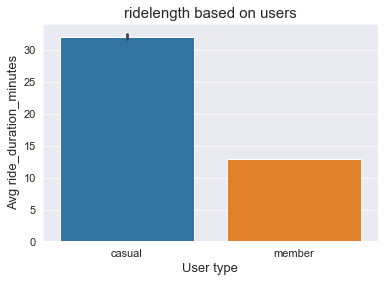

In [43]:
sns.set_style(style="darkgrid")
sns.barplot(x="member_casual",y="ride_duration_minutes",data=df)  #warn:plotting with df takes lot of time to execute
plt.title("ridelength based on users",fontsize=15)
plt.xlabel("User type",fontsize=13)
plt.ylabel("Avg ride_duration_minutes",fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.show()

**OBSERVATION:**

Casual members spend more time on Cyclistic bike trips than annual members
We can observe that average ride length of casual riders(32.05 minutes) which is almost 2.5 times more than the annual_member riders(12.94 minutes)

In [44]:
df.groupby('member_casual')['start_day_of_week'].count()

member_casual
casual    2044294
member    2596985
Name: start_day_of_week, dtype: int64

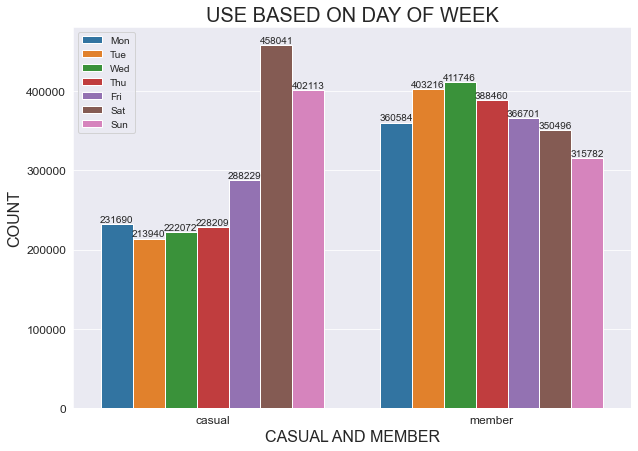

In [45]:
plt.rcParams["figure.figsize"] = (10,7) # width,height of plot 
sns.set_style(style="darkgrid")
colors = sns.color_palette('pastel')
fig=sns.countplot(x='member_casual',hue='start_day_of_week',data=df,hue_order=["Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
#for labels of values on bars
for container in fig.containers:
    fig.bar_label(container)
plt.title("USE BASED ON DAY OF WEEK",fontsize=20)
plt.xlabel("CASUAL AND MEMBER",fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel("COUNT",fontsize=16)
plt.legend()
plt.show()

**OBSERVATION:**

1.Casual:We can see casual members use the ride more on weekends(saturday and sunday) when compared to week days 

2.Members: Use the ride maximum during the weekdays(Tuesday and wednesday),and we can find that there is no significant difference between the usage in weekdays and weekends 

In [46]:
for_pie3=df["member_casual"].value_counts().reset_index()
for_pie3

,index,member_casual
0,member,2596985
1,casual,2044294


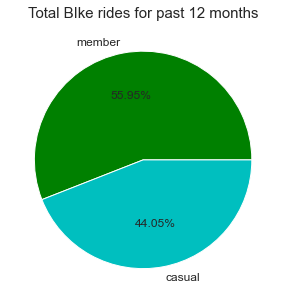

In [47]:
plt.rcParams["figure.figsize"] = (5,5)
sns.set_style(style="darkgrid")
plt.pie(for_pie3["member_casual"],labels=for_pie3["index"],autopct='%1.2f%%',colors=['g','c'],textprops={'fontsize': 12})
plt.title("Total BIke rides for past 12 months",fontsize=15)
plt.show()

**Observation:**
For past 12 months 55.95 % was used by member user and 44.05 % was used by casual member 


In [48]:
for_casual=df.groupby(["member_casual","rideable_type"])["ride_id"].count()["casual"].reset_index()
for_casual

,rideable_type,ride_id
0,classic_bike,1252581
1,docked_bike,303519
2,electric_bike,488194


In [49]:
for_member=df.groupby(["member_casual","rideable_type"])["ride_id"].count()["member"].reset_index()
for_member

,rideable_type,ride_id
0,classic_bike,1989324
1,docked_bike,0
2,electric_bike,607661


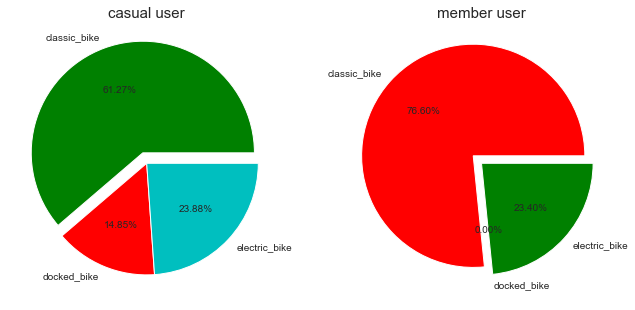

In [50]:
plt.rcParams["figure.figsize"] = (11,10)
plt.figure()
sns.set_style(style="darkgrid")
plt.subplot(121)
plt.pie(for_casual["ride_id"],labels=for_casual["rideable_type"],autopct='%1.2f%%', explode=(0.1,0,0),colors=['g','r','c'])
plt.title("casual user",fontsize=15)
plt.subplot(122)
plt.pie(for_member["ride_id"],labels=for_member["rideable_type"],autopct='%1.2f%%', explode=(0.1,0,0),colors=['r','y','g'])
plt.title("member user",fontsize=15)
plt.show()

**Observation:**

1.Both casual and member user prefer classic bikes the most

2.electric bike usage is almost same for both casual and member



In [51]:
#based on weekday and weekend 
for_week1=df.groupby(["member_casual","Weekday/weekend"])["ride_id"].count()["casual"].reset_index()
for_week1

,Weekday/weekend,ride_id
0,Weekday,1184140
1,Weekend,860154


In [52]:
#based on weekday and weekend 
for_week2=df.groupby(["member_casual","Weekday/weekend"])["ride_id"].count()["member"].reset_index()
for_week2

,Weekday/weekend,ride_id
0,Weekday,1930707
1,Weekend,666278


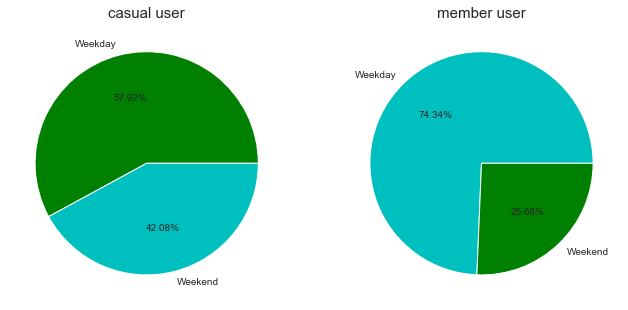

In [53]:
plt.rcParams["figure.figsize"] = (11,10)
plt.figure()
sns.set_style(style="darkgrid")
plt.subplot(121)
plt.pie(for_week1["ride_id"],labels=for_week1["Weekday/weekend"],autopct='%1.2f%%',colors=['g','c'])
plt.title("casual user",fontsize=15)
plt.subplot(122)
plt.pie(for_week2["ride_id"],labels=for_week2["Weekday/weekend"],autopct='%1.2f%%', colors=['c','g'])
plt.title("member user",fontsize=15)
plt.show()

**Observation**

casual members ride almost equal in weekday and weekend

members ride the most in weekday

In [54]:
#for each bike types
for_type=df.groupby(["member_casual","rideable_type"])["ride_duration_minutes"].mean().reset_index()
for_type

,member_casual,rideable_type,ride_duration_minutes
0,casual,classic_bike,25.859059
1,casual,docked_bike,77.486131
2,casual,electric_bike,19.680435
3,member,classic_bike,13.335165
4,member,docked_bike,NaN
5,member,electric_bike,11.652368


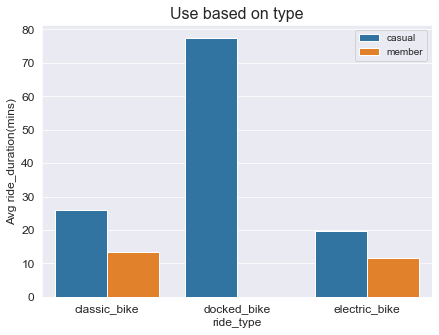

In [55]:
plt.rcParams["figure.figsize"] = (7,5) # width,height of plot 
sns.set_style(style="darkgrid")
sns.barplot(x='rideable_type',y="ride_duration_minutes",hue='member_casual',data=for_type)
plt.title("Use based on type",fontsize=16)
plt.xlabel("ride_type",fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel("Avg ride_duration(mins)",fontsize=12)
plt.legend()
plt.show()

Obervation:
Casual use docked_bike for longer trips


In [56]:
#for months based analysis 
for_month1=df.groupby(['Month',"member_casual"])["ride_id"].count().reset_index()
for_month1.head()

,Month,member_casual,ride_id
0,apr,casual,120420
1,apr,member,177783
2,aug,casual,341469
3,aug,member,332916
4,dec,casual,45076


In [57]:
#sorting based on month
order1={"jan":1,'feb':2,"mar":3,"apr":4,"may":5,"june":6,"july":7,"aug":8,"sep":9,"oct":10,"nov":11,"dec":12}
for_month1["monthorder"]=for_month1["Month"].map(order1)
for_month1.sort_values("monthorder",inplace=True)
for_month1.head(3)

,Month,member_casual,ride_id,monthorder
8,jan,casual,12605,1
9,jan,member,67523,1
6,feb,casual,15144,2


In [58]:
for_month2=df.groupby(['Month',"member_casual"])["ride_duration_minutes"].mean().reset_index()
order1={"jan":1,'feb':2,"mar":3,"apr":4,"may":5,"june":6,"july":7,"aug":8,"sep":9,"oct":10,"nov":11,"dec":12}
for_month2["monthorder"]=for_month2["Month"].map(order1)
for_month2.sort_values("monthorder",inplace=True)
for_month2.head(3)

,Month,member_casual,ride_duration_minutes,monthorder
8,jan,casual,27.355241,1
9,jan,member,10.269924,1
6,feb,casual,24.823541,2


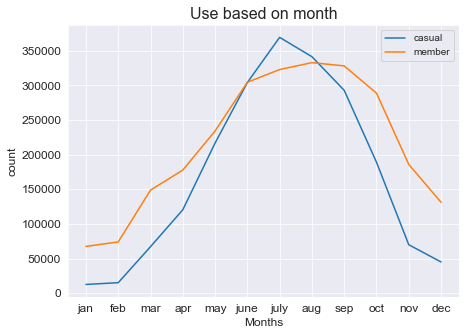

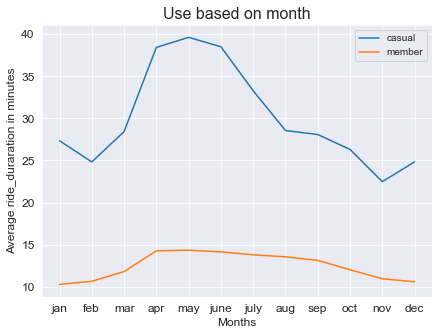

In [59]:
plt.rcParams["figure.figsize"] = (7,5) # width,height of plot 
sns.set_style(style="darkgrid")
fig=sns.lineplot(x='Month',y="ride_id",hue='member_casual',data=for_month1)
plt.title("Use based on month",fontsize=16)
plt.xlabel("Months",fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel("count",fontsize=12)
plt.legend()
plt.show()

plt.rcParams["figure.figsize"] = (7,5) # width,height of plot 
sns.set_style(style="darkgrid")
sns.lineplot(x='Month',y="ride_duration_minutes",hue='member_casual',data=for_month2)
plt.title("Use based on month",fontsize=16)
plt.xlabel("Months",fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel("Average ride_duraration in minutes",fontsize=12)
plt.legend()
plt.show()

**Observation:**

Based on No of ride's:

1.In june,july and august months the casual user's no of ride is more than the annual member

2.least usage of bikes by both casual and member user is in month of january,febraury,november an d

3.peak usage of bikes by both casual and member user is in month of july and august

Based on average ride_duration in minutes 

1.The ride duration of the member user is almost consistent throughout the year

2.Casual users tend to ride for longer duration in months april,may and june 

3.Throughout the year casual user spend the most time in rides compared with member users

In [60]:
#for time based analysis 
for_time1=df.groupby(["Time","member_casual"])["ride_id"].count().reset_index()
for_time1.head()

,Time,member_casual,ride_id
0,0,casual,42116
1,0,member,25733
2,1,casual,30724
3,1,member,16753
4,2,casual,19793


In [61]:
for_time2=df.groupby(["Time","member_casual"])["ride_duration_minutes"].mean().reset_index()
for_time2.head()

,Time,member_casual,ride_duration_minutes
0,0,casual,34.054979
1,0,member,12.667007
2,1,casual,37.936394
3,1,member,13.708316
4,2,casual,42.876799


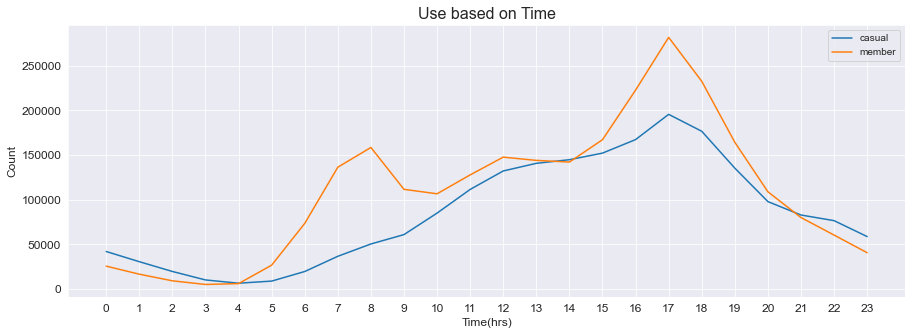

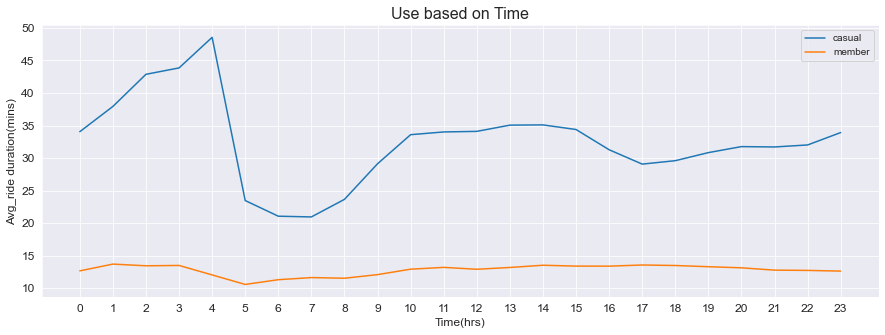

In [62]:
plt.rcParams["figure.figsize"] = (15,5) # width,height of plot 
sns.set_style(style="darkgrid")
sns.lineplot(x='Time',y="ride_id",hue='member_casual',data=for_time1)
plt.title("Use based on Time",fontsize=16)
plt.xlabel("Time(hrs)",fontsize=12)
plt.xticks(np.arange(0,24, 1),fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.legend()
plt.show()

plt.rcParams["figure.figsize"] = (15,5) # width,height of plot 
sns.set_style(style="darkgrid")
sns.lineplot(x='Time',y="ride_duration_minutes",hue='member_casual',data=for_time2)
plt.title("Use based on Time",fontsize=16)
plt.xlabel("Time(hrs)",fontsize=12)
plt.xticks(np.arange(0,24, 1),fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel("Avg_ride duration(mins)",fontsize=12)
plt.legend()
plt.show()

**Observation:**

Based on No of ride's:

Casual:Tend to be more active during the afternoon and late evenings

Member:Are active at all times of the day, more so in the morning and afternoon





In [67]:
for_time3=df.groupby(["Time","Month","member_casual"])["ride_id"].count().reset_index().rename(columns={"ride_id":"Count"})
for_time3.head()

,Time,Month,member_casual,Count
0,0,apr,casual,2183
1,0,apr,member,1467
2,0,aug,casual,7321
3,0,aug,member,3633
4,0,dec,casual,762


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


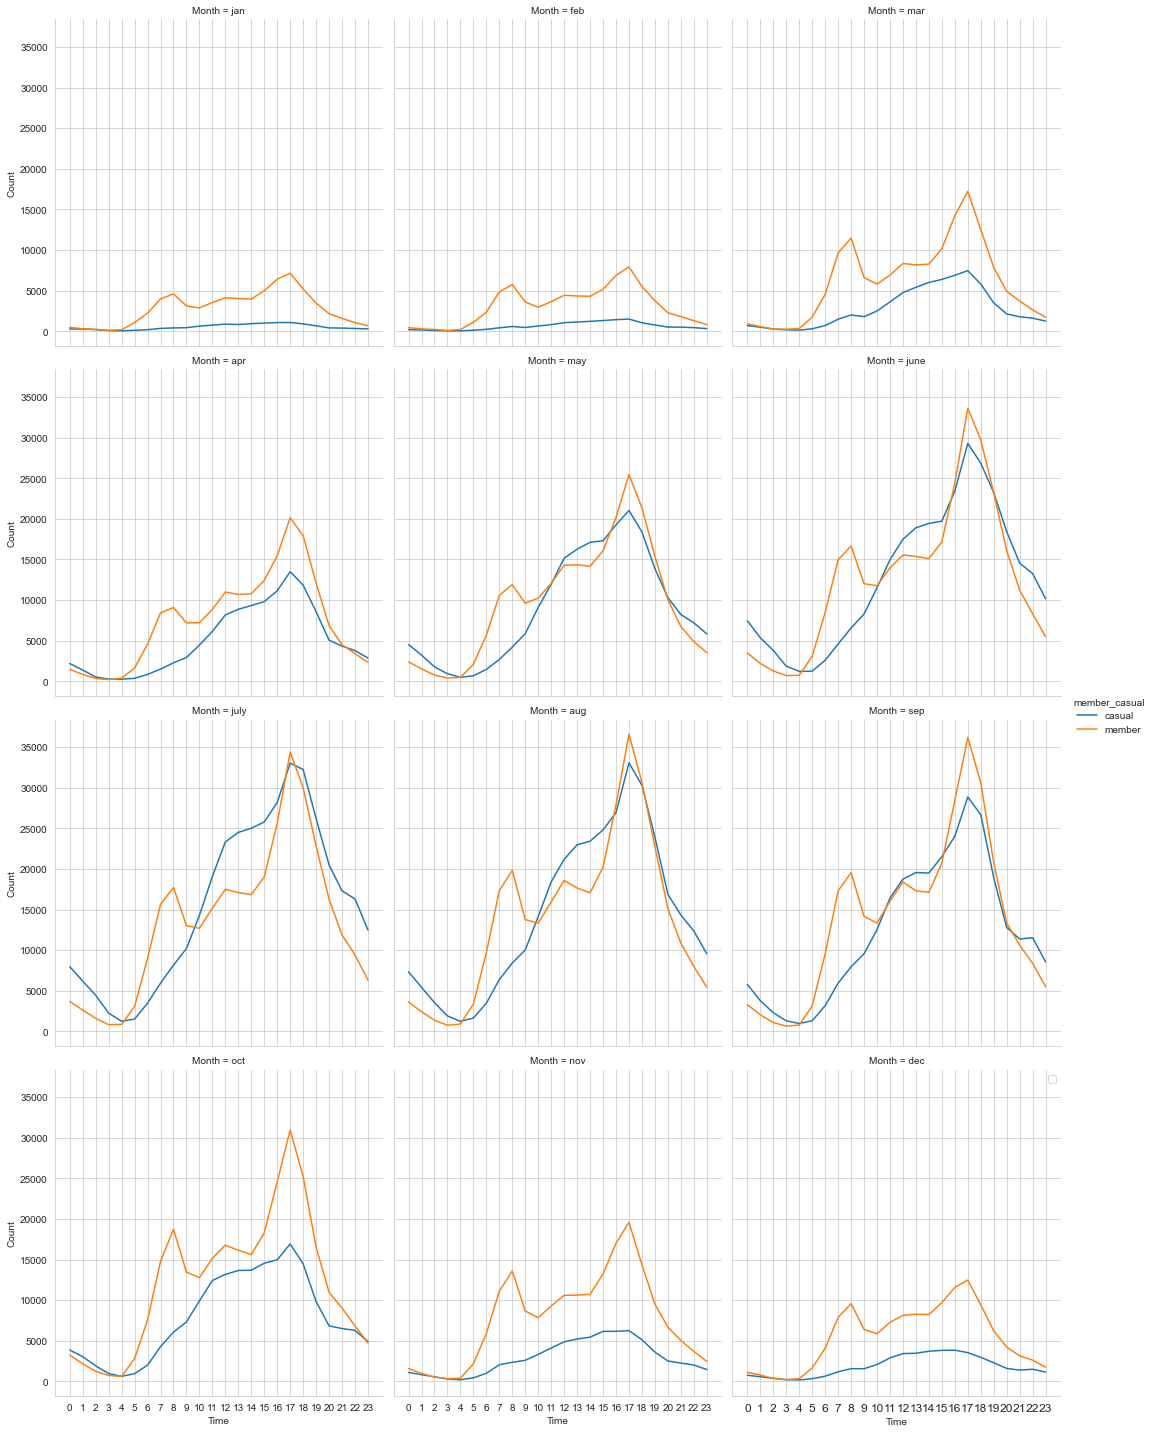

In [69]:
plt.rcParams["figure.figsize"] = (15,15) # width,height of plot 
sns.set_style(style="whitegrid")
order1=["jan",'feb',"mar","apr","may","june","july","aug","sep","oct","nov","dec"]
sns.relplot(x='Time',y="Count",hue='member_casual',data=for_time3,kind="line",col="Month",col_wrap=3,col_order=order1)
plt.xticks(np.arange(0,24, 1),fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.show()

## OVERALL OBSERVATION 

How casual and members differ?

Findings Summary:

Casuals:

    Casual members spend more time on Cyclistic bike trips than annual members
    We can observe that average ride length of casual riders(32.05 minutes) which is almost 2.5 times more than the annual_member riders(12.94 minutes)
    For past 12 months 55.95 % was used by member user and 44.05 % was used by casual member
    Use the ride more on weekends(saturday and sunday) when compared to week days
    Prefer classic bikes the most
    Use docked_bike for longer trips
    Are more numerous during summer 
    Tend to be more active during the afternoon and late evenings
    Consistently have longer ride lengths year-round
    Favor docked bikes for lengthy bike trips
    Have a negligible presence during the winter months(maybe they are using cars)

Members:

    Use the ride maximum during the weekdays,and we can find that there is no significant difference between the usage in weekdays and weekends
    Prefer classic bikes the most
    Have steady average ride duration year-round
    Are active at all times of the day, more in the morning and evening
    Are more consistent with their bike trips(av ride_duration) year-round
         

**Further actions:**

1.Spending additional resources on Data Extraction and Analysis

we need to survey a significant sample of our user population to discover what truly defines each user group's behavior. collecting more  qualitative data that would provide insights like opinions and motivations (what do they use Cyclistic bikes for?) gives some much-needed context behind our initial findings.

In addition, collecting more quantitative data like income, age, and weight will give us better undersatnding.

**Top three recommendations moving forward:**

1.Consider alternatives to conversion, such as new service and pricing models

Membership Plans which has pricing less than annual membership providing benefits to the casual users 

Ex:Plans providing unlimited pass for weekends 

2.Explore ways to convey the benefits of biking more frequently

By telling customers

They saved this much money on fuel like petrol,
Tell them how many calories they burnt by cycling and how to imporves their life expectancy

3.Explore models that reward higher-priced offerings with additional privileges

Give additional benefits to annual members than casuals 
Members can be given advance reservation option for bikes,this would minimize this inconvenience for Members, Casuals will face the inconvenience. 
This is risky in the sense that it could cause severe backlash.Casual may move to competitors 
However, Cyclistic could execute a strategy that slowly makes these changes long-term 
